In [1]:
import pandas as pd
car = pd.read_csv("data/car_stocks.csv")
tit = pd.read_csv("data/titanic.csv")
tit['age'] = tit.age.replace(["?"],[None]).astype("float")
tit['fare'] = tit.age.replace(["?"],[None]).astype("float")

In [3]:
car.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,RIVN,2021-11-10,106.750000,119.459999,95.199997,100.730003,100.730003,103679500
1,RIVN,2021-11-11,114.625000,125.000000,108.010002,122.989998,122.989998,83668200
2,RIVN,2021-11-12,128.645004,135.199997,125.250000,129.949997,129.949997,50437500
3,RIVN,2021-11-15,130.800003,152.529999,127.510002,149.360001,149.360001,64982300
4,RIVN,2021-11-16,163.800003,179.470001,153.779999,172.009995,172.009995,94036600


## 1. Groups

In [19]:
tit_sex = tit.groupby(by = "sex")

#### `ngroups` tells us how many groups.

In [9]:
tit_sex.ngroups

2

In [10]:
tit_sex.groups

{'female': [0, 2, 4, 6, 8, 11, 12, 13, 17, 18, 21, 23, 24, 27, 28, 32, 33, 35, 36, 41, 42, 43, 44, 48, 50, 55, 57, 59, 61, 63, 65, 66, 67, 69, 72, 73, 76, 78, 79, 82, 83, 85, 88, 90, 92, 95, 97, 98, 99, 102, 103, 104, 105, 107, 108, 111, 112, 113, 116, 117, 121, 122, 124, 127, 129, 130, 131, 134, 137, 139, 141, 144, 146, 149, 153, 155, 159, 160, 161, 163, 167, 168, 169, 176, 178, 180, 181, 182, 186, 187, 188, 190, 192, 193, 195, 198, 199, 204, 207, 208, ...], 'male': [1, 3, 5, 7, 9, 10, 14, 15, 16, 19, 20, 22, 25, 26, 29, 30, 31, 34, 37, 38, 39, 40, 45, 46, 47, 49, 51, 52, 53, 54, 56, 58, 60, 62, 64, 68, 70, 71, 74, 75, 77, 80, 81, 84, 86, 87, 89, 91, 93, 94, 96, 100, 101, 106, 109, 110, 114, 115, 118, 119, 120, 123, 125, 126, 128, 132, 133, 135, 136, 138, 140, 142, 143, 145, 147, 148, 150, 151, 152, 154, 156, 157, 158, 162, 164, 165, 166, 170, 171, 172, 173, 174, 175, 177, 179, 183, 184, 185, 189, 191, ...]}

`first()` show us the first one in group.

In [11]:
tit_sex.first()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
sex,,,,,,,,,,,,,
female,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
male,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"


#### `get_group()` Get the group by name. Return a dataframe contains all in the group.

In [12]:
tit_sex.get_group("female")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,?,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,?,C,C,?,?
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,?,S,?,?,?
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,?,C,?,?,?
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?


In [14]:
for name, group in tit_sex:
    print(name)  # name is groupname
    print("---")
    print(group)  # dateframe

female
---
      pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
2          1         0                     Allison, Miss. Helen Loraine   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
6          1         1                Andrews, Miss. Kornelia Theodosia   
8          1         1    Appleton, Mrs. Edward Dale (Charlotte Lamson)   
...      ...       ...                                              ...   
1286       3         1  Whabee, Mrs. George Joseph (Shawneene Abi-Saab)   
1290       3         1                 Wilkes, Mrs. James (Ellen Needs)   
1300       3         1          Yasbeck, Mrs. Antoni (Selini Alexander)   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   

         sex   age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     femal

## 2. Split, Apply, and Combine

In [20]:
tit_age = tit.groupby(by = "age")

the mean age of each gender group.

In [22]:
tit_sex["age"].mean()

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

In [23]:
tit_sex["age"].max()

sex
female    76.0
male      80.0
Name: age, dtype: float64

<Axes: ylabel='age'>

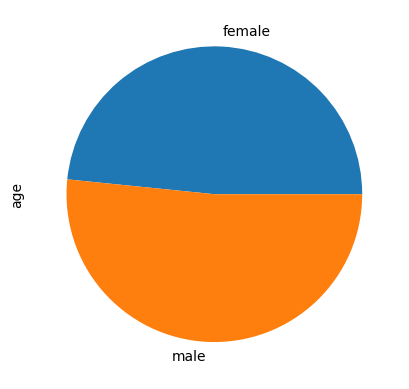

In [24]:
tit_sex["age"].mean().plot(kind = "pie")

In [26]:
car.groupby("Symbol")["High"].max()

Symbol
GM       65.180000
LCID     57.750000
RIVN    179.470001
Name: High, dtype: float64

#### aggregate allows us to run multiple functions on a group by object.

In [31]:
tit_sex["age"].agg(["min", "max", "mean", "median"])

,min,max,mean,median
sex,,,,
female,0.1667,76.0,28.687071,27.0
male,0.3333,80.0,30.585233,28.0


multiple columns

#### Specify the column using dictionary.

In [34]:
tit_sex.agg({"age": ["min", "max"], "pclass": "median"})

age       pclass
           min   max median
sex                        
female  0.1667  76.0    2.0
male    0.3333  80.0    3.0

#### Custom function.

In [36]:
#  find the highest age difference in each class.
def range(x):
    return x.max() - x.min()
tit.groupby("pclass")["age"].agg(range)

pclass
1    79.0833
2    69.3333
3    73.8333
Name: age, dtype: float64

In [38]:
def null_num(x):
    return x.size - x.count()

tit.groupby("pclass")["age"].agg(null_num)

pclass
1     39
2     16
3    208
Name: age, dtype: int64

`count`: count non-null values in each column and rows.

#### Named Aggregation

In [40]:
car.groupby("Symbol").agg({"Open":["min", "max"], "Close":["min", "max"]})

Open                   Close            
               min         max         min         max
Symbol                                                
GM       57.849998   64.330002   59.270000   64.610001
LCID     42.299999   56.200001   40.750000   55.520000
RIVN    106.750000  163.800003  100.730003  172.009995

In [41]:
car.groupby("Symbol").agg(min_open = ("Open", "min"),max_open = ("Open", "max") )

,min_open,max_open
Symbol,,
GM,57.849998,64.330002
LCID,42.299999,56.200001
RIVN,106.750000,163.800003


In [51]:
## 3. Groupby Mutiple Column
sl = tit.groupby("sex")["age"].mean()

In [48]:
sl.index

Index(['female', 'male'], dtype='object', name='sex')

In [56]:
new = tit.groupby(["pclass","sex"])["age"].mean()

In [52]:
new.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

So there are multiple index.

In [2]:
pop = pd.read_csv("data/state_pops.csv")

In [3]:
pop.set_index(["state", "year"], inplace = True)

In [70]:
pop

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

Default sorting every index.

In [71]:
pop.sort_index()

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

state stays unchanges, year acsending.

In [72]:
pop.sort_index(level =1)
# state is level 0

,,population
state,year,
AK,1990,553290.0
AL,1990,4050055.0
AR,1990,2356586.0
AZ,1990,3684097.0
CA,1990,29959515.0
...,...,...
VT,2013,626630.0
WA,2013,6971406.0
WI,2013,5742713.0


state descending, year acsending.

In [5]:
pop.sort_index(ascending = [False, True], level = [0,1])

population
state year            
WY    1990    453690.0
      1991    459260.0
      1992    466251.0
      1993    473081.0
      1994    480283.0
...                ...
AK    2009    698895.0
      2010    713868.0
      2011    723375.0
      2012    730307.0
      2013    735132.0

[1272 rows x 1 columns]

## 4. Using loc with a multiple index

In [6]:
pop.loc["UT"]

,population
year,
2012,2854871.0
2011,2814784.0
2010,2774424.0
2009,2723421.0
2013,2900872.0
2007,2597746.0
2008,2663029.0
2006,2525507.0
2005,2457719.0


In [7]:
pop.loc[("UT", 2010)]

population    2774424.0
Name: (UT, 2010), dtype: float64

In [8]:
 pop.loc[:, 1990,:]  # first : first index, last :all columns

,population
state,
AL,4050055.0
AK,553290.0
AZ,3684097.0
AR,2356586.0
CA,29959515.0
CO,3307618.0
CT,3291967.0
DE,669567.0
DC,605321.0


In [11]:
 pop.loc[:, [2000,2002],:]

,,population
state,year,
AL,2000,4452173.0
AK,2000,627963.0
AZ,2000,5160586.0
AR,2000,2678588.0
CA,2000,33987977.0
...,...,...
WV,2002,1805414.0
WI,2002,5445162.0
WY,2002,500017.0


**xs()**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html#pandas.DataFrame.xs

Return cross-section from the Series/DataFrame.

In [10]:
pop.xs(2013, level = 1)

,population
state,
AL,4833722.0
AK,735132.0
AZ,6626624.0
AR,2959373.0
CA,38332521.0
CO,5268367.0
CT,3596080.0
DE,925749.0
DC,646449.0


## 5. Get_level_value

In [13]:
pop.index.levels

FrozenList([['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'USA', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]])

In [14]:
pop.index.get_level_values(0)  # given level

Index(['AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL',
       ...
       'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA'],
      dtype='object', name='state', length=1272)

In [15]:
even_year = pop.index.get_level_values(1) % 2 == 0

In [16]:
len(even_year)

1272

In [17]:
pop[even_year]

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2008    4718206.0
      2006    4628981.0
      2004    4530729.0
...                 ...
USA   2004  292805298.0
      2006  298379912.0
      2008  304093966.0
      2010  309326295.0
      2012  313873685.0

[636 rows x 1 columns]

In [18]:
pop.index.get_level_values(0).str[1]  # give the second letter of index

Index(['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       ...
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S'],
      dtype='object', name='state', length=1272)

## 6. How to get value of multicolumns df

In [22]:
new_df = tit_sex.agg({"age": ["min", "max"], "pclass": "median"})

In [23]:
new_df["age","max"]

sex
female    76.0
male      80.0
Name: (age, max), dtype: float64

## 7. stack() and unstack()

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack

Stack the prescribed level(s) from columns to index.

Return a reshaped DataFrame or Series having a multi-level index with one or more new inner-most levels compared to the current DataFrame. 

In [24]:
pop

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [25]:
pop.unstack()

population                                                      \
year          1990         1991         1992         1993         1994   
state                                                                    
AK        553290.0     570193.0     588736.0     599434.0     603308.0   
AL       4050055.0    4099156.0    4154014.0    4214202.0    4260229.0   
AR       2356586.0    2383144.0    2415984.0    2456303.0    2494019.0   
AZ       3684097.0    3788576.0    3915740.0    4065440.0    4245089.0   
CA      29959515.0   30470736.0   30974659.0   31274928.0   31484435.0   
CO       3307618.0    3387119.0    3495939.0    3613734.0    3724168.0   
CT       3291967.0    3302895.0    3300712.0    3309175.0    3316121.0   
DC        605321.0     600870.0     597567.0     595302.0     589240.0   
DE        669567.0     683080.0     694927.0     706378.0     717545.0   
FL      13033307.0   13369798.0   13650553.0   13927185.0   14239444.0   
GA       6512602.0    6653005.0    6817203.0    6978240.0    7157165.0   
HI       1113491.0    1136754.0    1158613.0    1172838.0    1187536.0   
IA       2781018.0    2797613.0    2818401.0    2836972.0    2850746.0   
ID       1012384.0    1041316.0    1071685.0    1108768.0    1145140.0   
IL      11453316.0   11568964.0   11694184.0   11809579.0   11912585.0   
IN       5557798.0    5616388.0    5674547.0    5739019.0    5793526.0   
KS       2481349.0    2498722.0    2532395.0    2556547.0    2580513.0   
KY       3694048.0    3722328.0    3765469.0    3812206.0    3849088.0   
LA       4221532.0    4253279.0    4293003.0    4316428.0    4347481.0   
MA       6022639.0    6018470.0    6028709.0    6060569.0    6095241.0   
MD       4799770.0    4867641.0    4923369.0    4971889.0    5023060.0   
ME       1231719.0    1237081.0    1238508.0    1242302.0    1242662.0   
MI       9311319.0    9400446.0    9479065.0    9540114.0    9597737.0   
MN       4389857.0    4440859.0    4495572.0    4555956.0    4610355.0   
MO       5128880.0    5170800.0    5217101.0    5271175.0    5324497.0   
MS       2578897.0    2598733.0    2623734.0    2655100.0    2688992.0   
MT        800204.0     809680.0     825770.0     844761.0     861306.0   
NC       6664016.0    6784280.0    6897214.0    7042818.0    7187398.0   
ND        637685.0     635753.0     638223.0     641216.0     644806.0   
NE       1581660.0    1595919.0    1611687.0    1625590.0    1639041.0   
NH       1112384.0    1109929.0    1117785.0    1129458.0    1142561.0   
NJ       7762963.0    7814676.0    7880508.0    7948915.0    8014306.0   
NM       1521574.0    1555305.0    1595442.0    1636453.0    1682398.0   
NV       1220695.0    1296172.0    1351367.0    1411215.0    1499298.0   
NY      18020784.0   18122510.0   18246653.0   18374954.0   18459470.0   
OH      10864162.0   10945762.0   11029431.0   11101140.0   11152455.0   
OK       3148825.0    3175440.0    3220517.0    3252285.0    3280940.0   
OR       2860375.0    2928507.0    2991755.0    3060367.0    3121264.0   
PA      11903299.0   11982164.0   12049450.0   12119724.0   12166050.0   
PR             NaN          NaN          NaN          NaN          NaN   
RI       1005995.0    1010649.0    1012581.0    1015113.0    1015960.0   
SC       3501155.0    3570404.0    3620464.0    3663314.0    3705397.0   
SD        697101.0     703669.0     712801.0     722160.0     730790.0   
TN       4894492.0    4966587.0    5049742.0    5137584.0    5231438.0   
TX      17056755.0   17398005.0   17759738.0   18161612.0   18564062.0   
USA    249622814.0  252980942.0  256514231.0  259918595.0  263125826.0   
UT       1731223.0    1779780.0    1836799.0    1898404.0    1960446.0   
VA       6216884.0    6301217.0    6414307.0    6509630.0    6593139.0   
VT        564798.0     568606.0     572751.0     577748.0     583836.0   
WA       4903043.0    5025624.0    5160757.0    5278842.0    5375161.0   
WI       4904562.0    4964343.0    5025398.0    5084889.0    5133678.0   
WV       179

Single level index. But culomns are become years.
**Taking the second level and turn it into column.**

We can specify the level. Now the columns are st

In [26]:
pop.unstack(level = 0)

population                                                          \
state         AK         AL         AR         AZ          CA         CO   
year                                                                       
1990    553290.0  4050055.0  2356586.0  3684097.0  29959515.0  3307618.0   
1991    570193.0  4099156.0  2383144.0  3788576.0  30470736.0  3387119.0   
1992    588736.0  4154014.0  2415984.0  3915740.0  30974659.0  3495939.0   
1993    599434.0  4214202.0  2456303.0  4065440.0  31274928.0  3613734.0   
1994    603308.0  4260229.0  2494019.0  4245089.0  31484435.0  3724168.0   
1995    604412.0  4296800.0  2535399.0  4432499.0  31696582.0  3826653.0   
1996    608569.0  4331103.0  2572109.0  4586940.0  32018834.0  3919972.0   
1997    612968.0  4367935.0  2601091.0  4736990.0  32486010.0  4018293.0   
1998    619933.0  4404701.0  2626289.0  4883342.0  32987675.0  4116639.0   
1999    624779.0  4430141.0  2651860.0  5023823.0  33499204.0  4226018.0   
2000    627963.0  4452173.0  2678588.0  5160586.0  33987977.0  4326921.0   
2001    633714.0  4467634.0  2691571.0  5273477.0  34479458.0  4425687.0   
2002    642337.0  4480089.0  2705927.0  5396255.0  34871843.0  4490406.0   
2003    648414.0  4503491.0  2724816.0  5510364.0  35253159.0  4528732.0   
2004    659286.0  4530729.0  2749686.0  5652404.0  35574576.0  4575013.0   
2005    666946.0  4569805.0  2781097.0  5839077.0  35827943.0  4631888.0   
2006    675302.0  4628981.0  2821761.0  6029141.0  36021202.0  4720423.0   
2007    680300.0  4672840.0  2848650.0  6167681.0  36250311.0  4803868.0   
2008    687455.0  4718206.0  2874554.0  6280362.0  36604337.0  4889730.0   
2009    698895.0  4757938.0  2896843.0  6343154.0  36961229.0  4972195.0   
2010    713868.0  4785570.0  2922280.0  6408790.0  37333601.0  5048196.0   
2011    723375.0  4801627.0  2938506.0  6468796.0  37668681.0  5118400.0   
2012    730307.0  4817528.0  2949828.0  6551149.0  37999878.0  5189458.0   
2013    735132.0  4833722.0  2959373.0  6626624.0  38332521.0  5268367.0   

                                                  ...                         \
state         CT        DC        DE          FL  ...         TN          TX   
year                                              ...                          
1990   3291967.0  605321.0  669567.0  13033307.0  ...  4894492.0  17056755.0   
1991   3302895.0  600870.0  683080.0  13369798.0  ...  4966587.0  17398005.0   
1992   3300712.0  597567.0  694927.0  13650553.0  ...  5049742.0  17759738.0   
1993   3309175.0  595302.0  706378.0  13927185.0  ...  5137584.0  18161612.0   
1994   3316121.0  589240.0  717545.0  14239444.0  ...  5231438.0  18564062.0   
1995   3324144.0  580519.0  729735.0  14537875.0  ...  5326936.0  18958751.0   
1996   3336685.0  572379.0  740978.0  14853360.0  ...  5416643.0  19340342.0   
1997   3349348.0  567739.0  751487.0  15186304.0  ...  5499233.0  19740317.0   
1998   3365352.0  565232.0  763335.0  15486559.0  ...  5570045.0  20157531.0   
1999   3386401.0  570220.0  774990.0  15759421.0  ...  5638706.0  20558220.0   
2000   3411777.0  572046.0  786373.0  16047515.0  ...  5703719.0  20944499.0   
2001   3432835.0  574504.0  795699.0  16356966.0  ...  5750789.0  21319622.0   
2002   3458749.0  573158.0  806169.0  16689370.0  ...  5795918.0  21690325.0   
2003   3484336.0  568502.0  818003.0  17004085.0  ...  5847812.0  22030931.0   
2004   3496094.0  567754.0  830803.0  17415318.0  ...  5910809.0  22394023.0   
2005   3506956.0  567136.0  845150.0  17842038.0  ...  5991057.0  22778123.0   
2006   3517460.0  570681.0  859268.0  18166990.0  ...  6088766.0  23359580.0   
2007   3527270.0  574404.0  871749.0  18367842.0  ...  6175727.0  23831983.0   
2008   3545579.0  580236.0  883874.0  18527305.0  ...  6247411.0  24309039.0   
2009   3561807.0  592228.0  891730.0  18652644.0  ...  6306019.0  24801761.0   
2010   3579210.0  605125.0  899711.0  18846054.0  ...  6356683.0  25245178.0   
2011   3588948.0  619624.0  90798

<Axes: xlabel='None,state'>

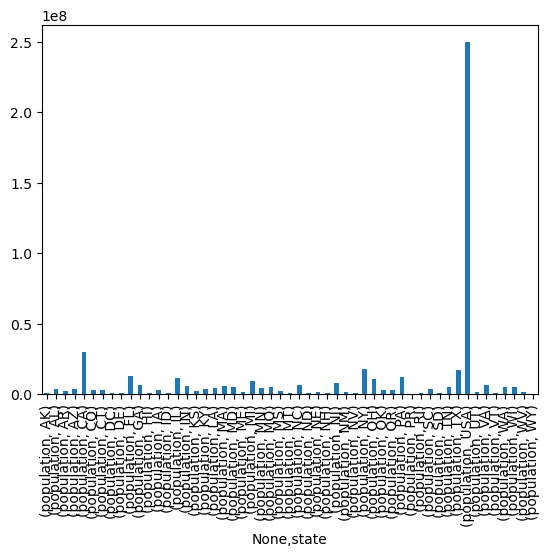

In [15]:
pop.unstack(level = 0).loc[1990].plot(kind = "bar")

<Axes: xlabel='sex,survived'>

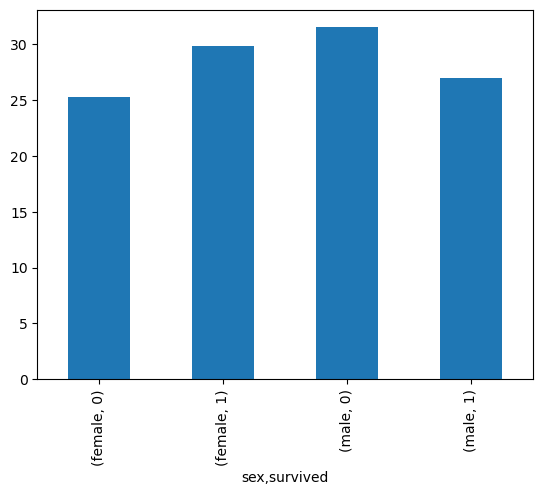

In [27]:
tit.groupby(["sex","survived"])["age"].mean().plot(kind = "bar")

In [29]:
tit.groupby(["sex","survived"])["age"].mean().unstack()

survived,0,1
sex,,
female,25.255208,29.815354
male,31.516412,26.977778


<Axes: xlabel='sex'>

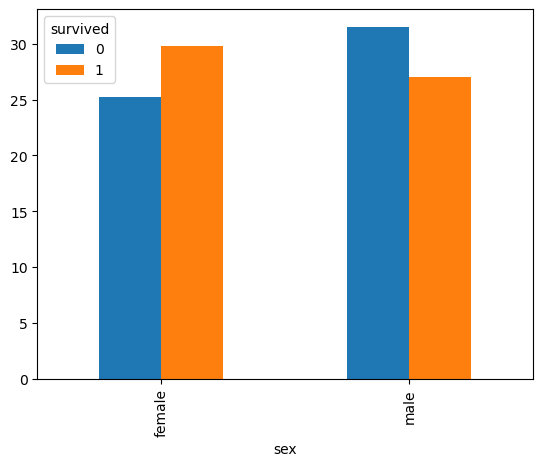

In [28]:
tit.groupby(["sex","survived"])["age"].mean().unstack().plot(kind = "bar")

In [8]:
## 8. Groupby Index

In [7]:
pop.groupby(level = 1).sum()

,population
year,
1990,499245628.0
1991,505961884.0
1992,513028462.0
1993,519837190.0
1994,526251652.0
1995,532556806.0
1996,538788582.0
1997,545293864.0
1998,551708232.0
